In [1]:
import time
import tensorflow as tf
import numpy as np
import pandas as pd
import argparse
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# For plotting
import matplotlib as mpl
import matplotlib.pyplot as plt


# Model Libraries
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from keras.callbacks import TensorBoard, EarlyStopping
from keras import optimizers,regularizers

Using TensorFlow backend.


In [2]:
startTime = time.time()

In [3]:
L = 20
num_classes = 1
neurons = 2
epochs = 10
batchSize = 1024
lamb = 1e-3
cost_function = 'binary_crossentropy'
learning_rate = 1e-3
dataKind = "hex"

# Graph Parameters
ylim = 0.4
color_min_and_max = 0.20


In [4]:
myPath = os.path.abspath(os.path.dirname("__file__"))

path = os.path.join(myPath, "../train_data/data_"+ dataKind + "/data_" + str(L) + "_5000new" + dataKind + ".npy")
#graphDataPath = os.path.join(myPath, "../train_data/data_"+ dataKind + "/data_" + str(L) + "_8400" + dataKind + ".npy")
graphDataPath = os.path.join(myPath, "../train_data/data_"+ dataKind + "/data_" + str(L) + "_3000" + dataKind + ".npy")

# #square
# path = os.path.join(myPath, "../train_data/data_"+ dataKind + "/data_" + str(L) + "_" + dataKind + ".txt")
# #graphDataPath = os.path.join(myPath, "../train_data/data_"+ dataKind + "/data_" + str(L) + "_8400" + dataKind + ".npy")
# graphDataPath = os.path.join(myPath, "../train_data/data_"+ dataKind + "/data_" + str(L) + "_" + dataKind + ".txt")

xTrain = np.load(path)

# #square
# xTrain = np.loadtxt(path)

xTrain

array([[ 1., -1., -1., ...,  1., -1., -1.],
       [-1.,  1., -1., ..., -1., -1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1., -1.],
       ...,
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

In [5]:
yTrain = np.zeros((xTrain.shape[0], 1))
yTrain[245000:,:]= 1

# #square
# yTrain[250000:,:]= 1

yTrain

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [6]:
xTrain, xTest, yTrain, yTest = train_test_split(xTrain, yTrain, test_size=0.2)

xTrain, xVal, yTrain, yVal = train_test_split(xTrain, yTrain, test_size=0.25)

In [7]:
nowTime = time.strftime(dataKind + "-L" + str(L) + "-E" + str(epochs) + "-%I.%M-%b_%d-" + str(len(xTrain)))

os.makedirs("logs/{}".format(nowTime))
tensorboard = TensorBoard(log_dir="logs/{}".format(nowTime))

In [8]:
#Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = neurons, kernel_initializer = 'truncated_normal', kernel_regularizer=regularizers.l2(lamb), activation = 'sigmoid', input_dim = (L*L)))

# Adding the output layer
classifier.add(Dense(units = num_classes, kernel_initializer = 'truncated_normal', kernel_regularizer=regularizers.l2(lamb), activation = 'sigmoid'))

adam = optimizers.adam(lr=learning_rate)

# Compiling the ANN
classifier.compile(optimizer = adam, loss = cost_function, metrics = ["accuracy"])

In [9]:
# Saving Model Weights and Bias in txt format
hiddenLayerWeights = classifier.layers[0].get_weights()[0]
hiddenLeyerBias = classifier.layers[0].get_weights()[1]

outputLayerWeights = classifier.layers[1].get_weights()[0]
outputLeyerBias = classifier.layers[1].get_weights()[1]

np.set_printoptions(threshold=np.inf, suppress=True)

f = open("logs/"+ str(nowTime) + "/Weights and Bias Before.txt","w")
f.write("Bias:\n" + str(hiddenLeyerBias) + "\nWeights:\n" + str(hiddenLayerWeights))
f.write("\nBias:\n" + str(outputLeyerBias) + "\nWeights:\n" + str(outputLayerWeights))
f.close()

print("Bias:\n" + str(hiddenLeyerBias) + "\nWeights:\n" + str(hiddenLayerWeights))
print("\nBias:\n" + str(outputLeyerBias) + "\nWeights:\n" + str(outputLayerWeights))

hiddenLayerWeights, hiddenLeyerBias, outputLayerWeights, outputLeyerBias = None, None, None, None

Bias:
[0. 0.]
Weights:
[[ 0.0405524   0.0696993 ]
 [-0.0750892   0.03673128]
 [-0.04394288  0.02762016]
 [ 0.0393316   0.04941909]
 [ 0.0733863   0.06186253]
 [ 0.09788952 -0.04301895]
 [ 0.0373948   0.01366836]
 [-0.02852488  0.08465785]
 [-0.00064401 -0.05667536]
 [ 0.02717251 -0.01484258]
 [ 0.00440117  0.05404101]
 [-0.05056053  0.08215646]
 [-0.02087075 -0.04616955]
 [-0.05226559 -0.04006485]
 [ 0.03134234  0.05222498]
 [-0.0256231  -0.00528633]
 [ 0.09133137 -0.06690025]
 [ 0.06220258  0.00364298]
 [-0.04295869 -0.06739621]
 [ 0.03465803 -0.0172563 ]
 [ 0.01513757  0.05842496]
 [-0.03666915  0.01563731]
 [-0.07067556 -0.02309519]
 [ 0.01489295  0.01733732]
 [-0.03602164 -0.03633848]
 [ 0.04744688 -0.07873402]
 [ 0.04993586 -0.01226367]
 [ 0.00660782  0.04520798]
 [-0.01824956  0.05112391]
 [ 0.05230838  0.00898562]
 [ 0.04402934 -0.0276737 ]
 [ 0.06718468  0.04539621]
 [ 0.06483358 -0.07931793]
 [-0.03408865  0.0821759 ]
 [-0.01022633 -0.03044803]
 [-0.03606864 -0.05364042]
 [ 0.

In [10]:
# Fitting the ANN to the Training set
classifier.fit(xTrain, yTrain, batch_size = batchSize, epochs = epochs, validation_data=(xVal, yVal), verbose=1 , callbacks=[tensorboard])

Train on 327000 samples, validate on 109000 samples
Epoch 1/10
327000/327000 [==============================] - 2s 7us/step - loss: 0.6867 - acc: 0.5503 - val_loss: 0.6803 - val_acc: 0.5498
Epoch 2/10
327000/327000 [==============================] - 2s 6us/step - loss: 0.6634 - acc: 0.5503 - val_loss: 0.6397 - val_acc: 0.5498
Epoch 3/10
327000/327000 [==============================] - 2s 6us/step - loss: 0.6070 - acc: 0.6208 - val_loss: 0.5727 - val_acc: 0.8114
Epoch 4/10
327000/327000 [==============================] - 2s 6us/step - loss: 0.5391 - acc: 0.8896 - val_loss: 0.5069 - val_acc: 0.9217
Epoch 5/10
327000/327000 [==============================] - 2s 6us/step - loss: 0.4785 - acc: 0.9285 - val_loss: 0.4520 - val_acc: 0.9326
Epoch 6/10
327000/327000 [==============================] - 2s 6us/step - loss: 0.4295 - acc: 0.9335 - val_loss: 0.4085 - val_acc: 0.9353
Epoch 7/10
327000/327000 [==============================] - 2s 6us/step - loss: 0.3909 - acc: 0.9352 - val_loss: 0.3743 

In [11]:
hours, rem = divmod(time.time() - startTime, 3600)
minutes, seconds = divmod(rem, 60)
timeTaken = "{:0>2}.{:0>2}.{:05.2f}".format(int(hours),int(minutes),seconds)


# Saving the model
classifier.save("logs/"+ str(nowTime) + "/model.h5")

# View accuracy of testing data
test = classifier.evaluate(xTest, yTest, verbose=0)
accuracy = test[1]
print("Test Accuracy: ", accuracy)

Test Accuracy:  0.934743119266055


In [12]:
# Saving Model Weights and Bias in txt format
hiddenLayerWeights = classifier.layers[0].get_weights()[0]
hiddenLeyerBias = classifier.layers[0].get_weights()[1]

outputLayerWeights = classifier.layers[1].get_weights()[0]
outputLeyerBias = classifier.layers[1].get_weights()[1]

f = open("logs/"+ str(nowTime) + "/Weights and Bias After.txt","w")
f.write("Bias:\n" + str(hiddenLeyerBias) + "\nWeights:\n" + str(hiddenLayerWeights))
f.write("\nBias:\n" + str(outputLeyerBias) + "\nWeights:\n" + str(outputLayerWeights))
f.close()

print("Bias:\n" + str(hiddenLeyerBias) + "\nWeights:\n" + str(hiddenLayerWeights))
print("\nBias:\n" + str(outputLeyerBias) + "\nWeights:\n" + str(outputLayerWeights))

Bias:
[-3.3838563 -3.3315759]
Weights:
[[ 0.01005919 -0.02262188]
 [ 0.01987199 -0.0297993 ]
 [ 0.01014353 -0.02407625]
 [ 0.02306123 -0.01979176]
 [ 0.00933049 -0.02999821]
 [ 0.02704192 -0.01669847]
 [ 0.02710409 -0.035205  ]
 [ 0.01293255 -0.01614859]
 [ 0.03572323 -0.02850437]
 [ 0.02389637 -0.02776299]
 [ 0.01837262 -0.01808242]
 [ 0.02823505 -0.02205761]
 [ 0.02142113 -0.02705842]
 [ 0.01263567 -0.02432736]
 [ 0.01842383 -0.02519109]
 [ 0.02626903 -0.02148183]
 [ 0.01785691 -0.02762386]
 [ 0.03157538 -0.0201172 ]
 [ 0.03044546 -0.02476019]
 [ 0.0186701  -0.02163656]
 [ 0.01877283 -0.01708567]
 [ 0.02757152 -0.00690826]
 [ 0.01951994 -0.01485487]
 [ 0.01424429 -0.03065054]
 [ 0.01242496 -0.03060725]
 [ 0.02891794 -0.02983491]
 [ 0.02160244 -0.0257883 ]
 [ 0.00663969 -0.01668497]
 [ 0.02654034 -0.01361861]
 [ 0.01779042 -0.02332442]
 [ 0.02560444  0.00050651]
 [ 0.01125432 -0.01596574]
 [ 0.00313377 -0.02446272]
 [ 0.02996488 -0.02517377]
 [ 0.0159486  -0.02033835]
 [ 0.0232833  -0

In [13]:
# Saving Model Parameters in txt format
f = open("logs/"+ str(nowTime) + "/Parameters.txt","w")
f.write("L," + str(L) + "\nNeurons," + str(neurons)+ "\nEpoch," + str(epochs)+ "\nlamb," + str(lamb)+
        "\nCost_Function," + str(cost_function) +"\nLearning_rate," + str(learning_rate) +"\nNum_Classes," + str(num_classes)+
        "\nLen_training," + str(len(xTrain))+"\nLen_testing," + str(len(xTest)) +"\nLen_validation," + str(len(xVal))+
        "\nTest_Accuracy," + str(accuracy) + "\nTime_taken," + timeTaken)

f.close()

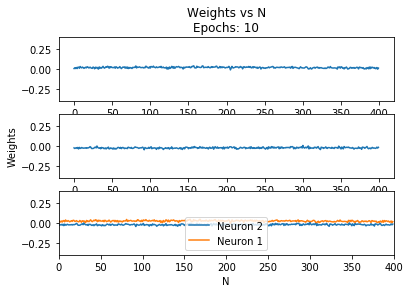

In [14]:
# Figure containing Neuron 1 & 2 weights
fig = plt.figure()

plot1 = fig.add_subplot(311)
axes = plt.gca()
axes.set_ylim([-ylim,ylim])
plt.title("Weights vs N\nEpochs: " + str(epochs))
plot1.plot(list(range(L*L)), hiddenLayerWeights[:,0], label="Neuron 1")

plot2 = fig.add_subplot(312)
axes = plt.gca()
axes.set_ylim([-ylim,ylim])
plt.ylabel("Weights")
plot2.plot(list(range(L*L)), hiddenLayerWeights[:,1], label="Neuron 2")

plot3 = fig.add_subplot(313)
axes = plt.gca()
axes.set_ylim([-ylim,ylim])
axes.set_xlim([0,L*L])
plt.xlabel("N")
plot3.plot(list(range(L*L)), hiddenLayerWeights[:,1], label="Neuron 2")
plot3.plot(list(range(L*L)), hiddenLayerWeights[:,0], label="Neuron 1")
plt.legend()

fig.savefig("logs/"+ str(nowTime) + "/weights_vs_n.pdf")


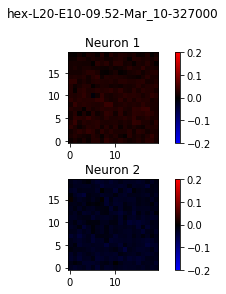

In [15]:
# Figure containing weights from one neuron color coded
fig = plt.figure()

plot1 = fig.add_subplot(211)
plt.title(nowTime + "\n\nNeuron 1")
zvals = np.reshape(hiddenLayerWeights[:,0], (L,L))
# make a color map of fixed colors
cmap2 = mpl.colors.LinearSegmentedColormap.from_list('my_colormap',['blue','black','red'],256)
# tell imshow about color map so that only set colors are used
img2 = plt.imshow(zvals,interpolation='nearest', cmap = cmap2, origin='lower', vmin=-color_min_and_max, vmax=color_min_and_max)
# make a color bar
plt.colorbar(img2,cmap=cmap2)

plot1 = fig.add_subplot(212)
plt.title("Neuron 2")
zvals = np.reshape(hiddenLayerWeights[:,1], (L,L))
# make a color map
cmap2 = mpl.colors.LinearSegmentedColormap.from_list('my_colormap',['blue','black','red'],256)
# tell imshow about color map so that only set colors are used
img2 = plt.imshow(zvals,interpolation='nearest', cmap = cmap2, origin='lower', vmin=-color_min_and_max, vmax=color_min_and_max)
# make a color bar
plt.colorbar(img2,cmap=cmap2)

plt.subplots_adjust(hspace=0.4)

fig.savefig("logs/"+ str(nowTime) + "/weights_color.pdf")

In [16]:
plt.clf()
xTrain, xTest, yTrain, yTest, xVal, yVal = None, None, None, None, None, None


graphData = np.load(graphDataPath)

# #square
# graphData = np.loadtxt(graphDataPath)

graphDataOutput = classifier.predict(graphData)

temperatures = np.linspace(0.3,3,109)

# #square
# temperatures = np.linspace(0.3,3,98)

#Calculate average value per each temperature
average = 0
yAxis = []
for index in range(len(graphDataOutput)):
    average += graphDataOutput[index][0]
    if ((index+1) % 3000) == 0:
        yAxis.append(average/3000)
        average = 0

# #square
# for index in range(len(graphDataOutput)):
#     average += graphDataOutput[index][0]
#     if ((index+1) % 100) == 0:
#         yAxis.append(average/100)
#         average = 0

yAxis = np.array(yAxis)
np.savetxt("logs/"+ str(nowTime) + "/yAxis.txt",yAxis)
print(temperatures)
print(yAxis)

[0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.    1.025 1.05  1.075 1.1   1.125 1.15  1.175
 1.2   1.225 1.25  1.275 1.3   1.325 1.35  1.375 1.4   1.425 1.45  1.475
 1.5   1.525 1.55  1.575 1.6   1.625 1.65  1.675 1.7   1.725 1.75  1.775
 1.8   1.825 1.85  1.875 1.9   1.925 1.95  1.975 2.    2.025 2.05  2.075
 2.1   2.125 2.15  2.175 2.2   2.225 2.25  2.275 2.3   2.325 2.35  2.375
 2.4   2.425 2.45  2.475 2.5   2.525 2.55  2.575 2.6   2.625 2.65  2.675
 2.7   2.725 2.75  2.775 2.8   2.825 2.85  2.875 2.9   2.925 2.95  2.975
 3.   ]
[0.2364847  0.23686049 0.23712632 0.23678929 0.23811932 0.23690133
 0.23834893 0.23895447 0.24005089 0.23909997 0.23984556 0.24048951
 0.24157695 0.24196114 0.24150826 0.24221468 0.24384584 0.24330652
 0.24348493 0.24563918 0.24403671 0.24563372 0.2479486  0.2480386
 0.25054578 0.25084438 0.25162648 0.25190126 0.25389669 0.25430473
 

<Figure size 432x288 with 0 Axes>

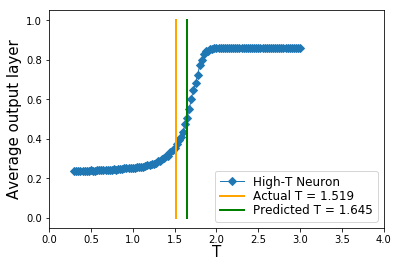

<Figure size 432x288 with 0 Axes>

In [17]:
# Plot the X and Y values
plt.plot(temperatures,yAxis,marker="D",markersize=5,linewidth=1,label="High-T Neuron")

# Add axis labels
plt.ylabel("Average output layer", fontsize=15)
plt.xlabel("T", fontsize=15,labelpad=0)
plt.xlim([0,4])

# Plot theoretical Tc line
y=[0,1]
if dataKind == "square":
    x=[2.26918,2.26918]
    plt.plot(x, y,color="#FFA500",linewidth=2, label="Actual T = 2.269")
elif dataKind == "hex":
    x=[1.519,1.519]
    plt.plot(x, y,color="#FFA500",linewidth=2, label="Actual T = 1.519")
else:
    x=[0,0]

# Calculate predicted Tc
interp = np.interp(0.5, yAxis, temperatures)

# Plot predicted Tc line
plt.plot([interp,interp], y,color="#008000",linewidth=2, label="Predicted T = {0:.3f}".format(interp))

# Add a legend
leg = plt.legend(loc="best",numpoints=1,markerscale=1.0,fontsize=12,labelspacing=0.1)

plt.show()

# Save Graph PDF
plt.savefig("logs/"+ str(nowTime) + "/neuralnetoutput.pdf")